# Working with Time Series in pandas

## Work By - **RAVJOT SINGH**

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03

##Table of Contents


---


1 Dates & Times in pandas

1.1 Importing the required libraries

1.2 Basic building block - pd.Timestamp

1.3 pd.Timestamp attributes

1.4 More building blocks - pd.Period

1.5 Basic date arithmetic

1.6 Sequences of dates and times

1.7 Time Series


---


2 Indexing & Resampling Time series

2.1 Air Quality Data - NYC

2.11 Importing the required libraries

2.12 Loading the dataset

2.13 Exploratory Data Analysis & Data Manipulation

2.131 Convert the string dates to datetime64

2.132 Setting the date column as index

2.14 Plotting the data

2.15 Partial string indexing

2.2 Google Stock Prices Data

2.21 Loading the dataset

2.22 Inspecting the data

2.23 Dropping Null values from the dataset

2.24 Changing the time series frequency

2.25 Plotting the data


---

3 Lags, Changes & Returns

3.1 Loading the dataset

3.2 Inspecting the data

3.3 Data Manipulations

3.31 .shift() - Moving data between past and future.

3.32 One-period percent change

3.33 .diff() - Built in time series change

3.34 .pct_change() - Built in time series percent change

3.35 Multi-period returns

---

Conclusion

---

##1 Dates & Times in pandas

###1.1 Importing the required libraries

In [76]:
import pandas as pd
from datetime import datetime

###1.2 Basic building block - `pd.Timestamp`

In [77]:
time_stamp = pd.Timestamp(datetime(1999, 9, 3))

In [78]:
type(time_stamp)

pandas._libs.tslibs.timestamps.Timestamp

In [79]:
time_stamp1 = pd.Timestamp("1999-9-3")

In [80]:
type(time_stamp1)

pandas._libs.tslibs.timestamps.Timestamp

In [81]:
time_stamp == time_stamp1
#Understands dates as strings

True

In [82]:
print(time_stamp)
print(time_stamp1)

1999-09-03 00:00:00
1999-09-03 00:00:00


###1.3 `pd.Timestamp` attributes

Timestamp object has many attributes to store time-specific information.

In [83]:
time_stamp.year

1999

In [84]:
time_stamp.month

9

In [85]:
time_stamp.day

3

In [86]:
time_stamp.day_name()

'Friday'

In [87]:
time_stamp.dayofweek

4

In [88]:
time_stamp.dayofyear

246

###1.4 More building blocks - `pd.Period`

Period object has freq attribute to store frequency info.

In [89]:
period = pd.Period('2017-01')  #default month-end
period

Period('2017-01', 'M')

In [90]:
period.asfreq('D')  #Convert freq to daily

Period('2017-01-31', 'D')

In [91]:
 x = period.to_timestamp(how='E')  #Convert pd.Period() to pd.Timestamp()
 x

Timestamp('2017-01-31 23:59:59.999999999')

In [92]:
type(x)

pandas._libs.tslibs.timestamps.Timestamp

In [93]:
y = x.to_period('D')  ##Converting pd.Timestamp to pd.Period
y

Period('2017-01-31', 'D')

In [94]:
type(y)

pandas._libs.tslibs.period.Period

###1.5 Basic date arithmetic

In [95]:
pd.Period('2018, 1') + 2

Period('2018-03', 'M')

In [96]:
#pd.Timestamp('2018-1-1','M') + 2

In [97]:
pd.Timestamp('2018-1-1','M') + pd.offsets.MonthBegin(2)

Timestamp('2018-03-01 00:00:00', freq='M')

###1.6 Sequences of dates and times

`pd.date_range()` : `start`, `end`, `periods`, `freq`

Specify `start` and `end`, with the default daily frequency.

In [98]:
pd.date_range(start='1/1/2020', end='1/10/2020')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

`pd.DatetimeIndex` : sequence of Timestamp objects with frequency info

Specify `start` and `periods`, the number of periods (days).

In [99]:
pd.date_range(start='1/1/2020', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

Specify `end` and `periods`, the number of periods (days).

In [100]:
pd.date_range(end='1/10/2020', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

Specify `start`, `end`, and `periods`; the frequency is generated automatically (linearly spaced).

In [101]:
pd.date_range(start='1/1/2020', end='1/10/2020', periods=5)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-03 06:00:00',
               '2020-01-05 12:00:00', '2020-01-07 18:00:00',
               '2020-01-10 00:00:00'],
              dtype='datetime64[ns]', freq=None)

Changed the `freq` (frequency) to 'M' (month end frequency).

In [102]:
pd.date_range(start='1/1/2020', periods=12, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

Changed the `freq` (frequency) to 'MS' (month start frequency).

In [103]:
pd.date_range(start='1/1/2020', periods=12, freq='MS')

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

Multiples are allowed

In [104]:
pd.date_range(start='1/1/2020', periods=4, freq='3M')

DatetimeIndex(['2020-01-31', '2020-04-30', '2020-07-31', '2020-10-31'], dtype='datetime64[ns]', freq='3M')

`freq` can also be specified as an Offset object.

In [105]:
pd.date_range(start='1/1/2020', periods=4, freq=pd.offsets.MonthEnd(3))

DatetimeIndex(['2020-01-31', '2020-04-30', '2020-07-31', '2020-10-31'], dtype='datetime64[ns]', freq='3M')

In [106]:
pd.date_range(start='2020-1-1', end='2020-2-29',freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
      

In [107]:
pd.date_range(start='2020-1-1', end='2020-12-31',freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

###1.7 Time series

In [108]:
# Create the range of dates here
seven_days = pd.date_range(start='2020-12-27', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


##2 Indexing & Resampling Time series

What do you mean by Time series transformation ?

Basic time series transformations includes - 

1.  Parsing string dates and converting it to `datetime64`.
2.  Selecting and slicing for specific subperiods.
3.  Setting and changing `DatetimeIndex` frequency - Upsampling or Downsampling.

###2.1 Air Quality Data - NYC

####2.11 Importing the required libraries

In [109]:
import matplotlib.pyplot as plt

####2.12 Loading the dataset

In [110]:
df = pd.read_csv('/content/nyc.csv')

####2.13 Exploratory Data Analysis & Data Manipulation

The info() function is used to print a concise summary of a DataFrame.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


#####2.131 Convert the string dates to `datetime64`

In [112]:
df.date = pd.to_datetime(df.date)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6317 non-null   datetime64[ns]
 1   ozone   6317 non-null   float64       
 2   pm25    6317 non-null   float64       
 3   co      6317 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 197.5 KB


#####2.132 Setting the `date` column as index

In [114]:
df.set_index('date', inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB


####2.14 Plotting the data

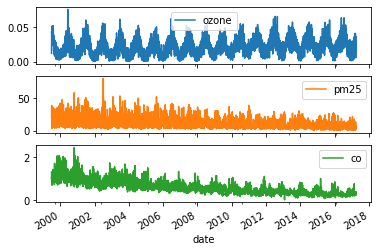

In [116]:
df.plot(subplots=True)
plt.show()

####2.15 Partial string indexing

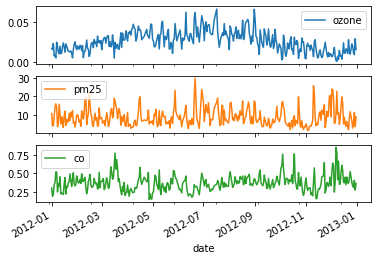

In [117]:
df.loc['2012'].plot(subplots=True)
plt.show()

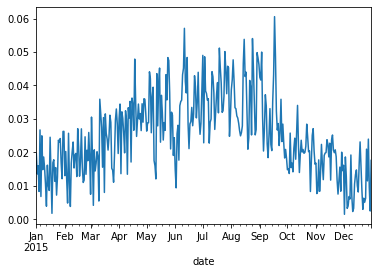

In [118]:
df.loc['2015'].ozone.plot()
plt.show()

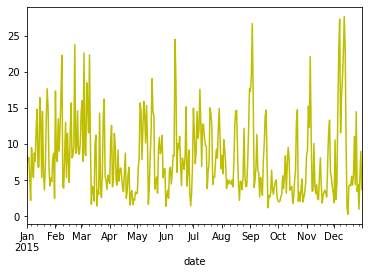

In [119]:
df.loc['2015','pm25'].plot(color='y')
plt.show()

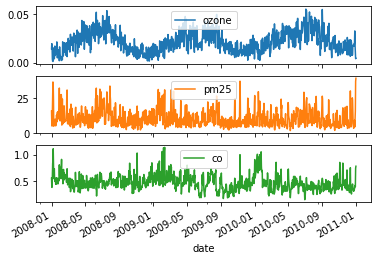

In [120]:
df.loc['2008':'2010'].plot(subplots=True)
plt.show()

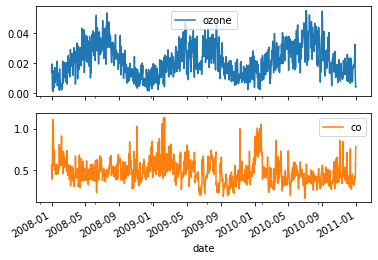

In [121]:
df.loc['2008':'2010', ['ozone','co']].plot(subplots=True)
plt.show()

In [122]:
df.loc['2016-1-1','pm25']

2.862500000000008

In [123]:
df.loc['2016','ozone']

date
2016-01-01    0.023206
2016-01-02    0.016853
2016-01-03    0.018488
2016-01-04    0.022117
2016-01-05    0.008279
                ...   
2016-12-27    0.018073
2016-12-28    0.013250
2016-12-29    0.013103
2016-12-30    0.017118
2016-12-31    0.024000
Name: ozone, Length: 366, dtype: float64

In [124]:
df.loc['2016','ozone'].mean()

0.02647883356102003

In [125]:
df.loc['2016','ozone'].median()

0.025268599999999995

###2.2 Google Stock Prices Data

####2.21 Loading the dataset
Parsing `Date` string to convert it into convert `datetime64` and setting it as index column.

In [126]:
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

####2.22 Inspecting the data 

In [127]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


####2.23 Dropping Null values from the dataset

In [128]:
google.dropna(axis=0, inplace=True)

In [129]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


####2.24 Changing the time series frequency

`asfreq('D')` -- Convert `DatetimeIndex` to calender day frequency.

In [130]:
google.asfreq('D').info()  #Sets calender day frequency - 'D'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


**Upsampling** -- 

Higher frequency implies new dates => missing data

In [131]:
google.asfreq('D').head(5)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


`asfreq('B')` -- Converts `DatetimeIndex` to business day frequency.

In [132]:
google.asfreq('B').info()  #Business days - 'B'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [133]:
google = google.asfreq('B')

Selecting Missing values from `Close` column in the dataset.

In [134]:
google[google.Close.isnull()]

,Close
Date,
2014-01-20,NaN
2014-02-17,NaN
2014-04-18,NaN
2014-05-26,NaN
2014-07-04,NaN
2014-09-01,NaN
2014-11-27,NaN
2014-12-25,NaN
2015-01-01,NaN


The result shows that these business days were not trading days.

In [135]:
google = google.dropna(axis=0)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


####2.25 Plotting the data

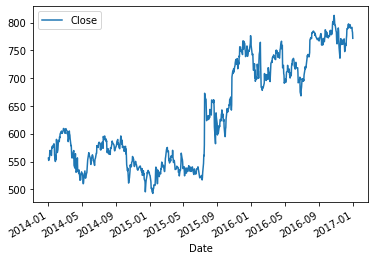

In [136]:
google.plot()
plt.show()

In [137]:
google_d = google.asfreq('D')  #google_d -- time series with calender days frequency
google_m = google.asfreq('M')  #google_m -- time series with monthly frequency

In [138]:
google_d.info()  #Inspecting the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [139]:
google_m.info()  #Inspecting the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2014-01-31 to 2016-11-30
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   25 non-null     float64
dtypes: float64(1)
memory usage: 560.0 bytes


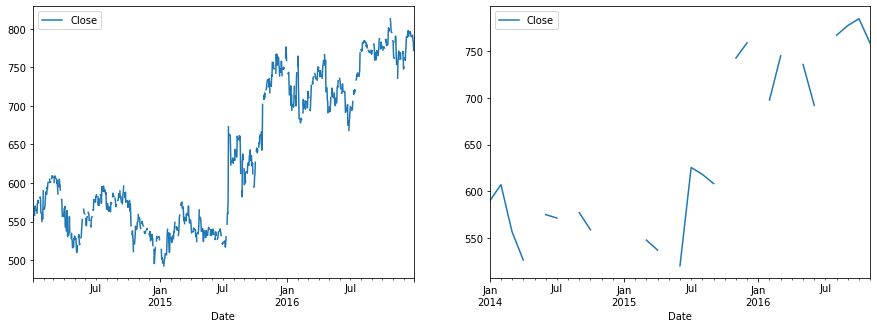

In [140]:
#Plotting both time-series data
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,5])
google_d.plot(ax=ax1)
google_m.plot(ax=ax2)
plt.show()

##3 Lags, Changes & Returns

What do you mean by Time series calculations ?

Typical Time Series manipulations include - 
1.  Shift or lag values back or forward back in time.
2.  Get the difference in value for a given time period.
3.  Compute the percent change over any number of periods.

###3.1 Loading the dataset
Parsing `Date` string to convert it into convert `datetime64` and setting it as index column.

In [141]:
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
google.dropna(axis=0, inplace=True) #Dropping the null values from the dataset

###3.2 Inspecting the data

In [142]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [143]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


###3.3 Data Manipulations

####3.31 `.shift()` -- Moving data between past & future.

Attributes -- 
1.  defaults to `periods=1`
2.  1 period into future.

In [144]:
google['Shifted'] = google.shift(periods=1)
google.head()

,Close,Shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-06,558.10,551.95
2014-01-07,568.86,558.10
2014-01-08,570.04,568.86


####3.32 `.shift(periods=-1)`

1.  Lagged data
2.  1 period back in time

In [145]:
google['Lagged'] = google.Close.shift(periods=-1)
google.tail()

,Close,Shifted,Lagged
Date,,,
2016-12-23,789.91,791.26,791.55
2016-12-27,791.55,789.91,785.05
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


####3.33 One-period percent change

`X(t)` / `X(t-1)`

In [146]:
google['Change'] = google.Close.div(google.Shifted)
google.head()

,Close,Shifted,Lagged,Change
Date,,,,
2014-01-02,556.00,NaN,551.95,NaN
2014-01-03,551.95,556.00,558.10,0.992716
2014-01-06,558.10,551.95,568.86,1.011142
2014-01-07,568.86,558.10,570.04,1.019280
2014-01-08,570.04,568.86,564.55,1.002074


In [147]:
google['Return'] = google.Change.sub(1).mul(100)
google.head()

,Close,Shifted,Lagged,Change,Return
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417
2014-01-06,558.10,551.95,568.86,1.011142,1.114231
2014-01-07,568.86,558.10,570.04,1.019280,1.927970
2014-01-08,570.04,568.86,564.55,1.002074,0.207432


####3.34 `.diff()` -- built in time series change

1.  Difference in value for 2 adjacent periods.
2.  `X(t)` - `X(t-1)`

In [148]:
google['Diff'] = google.Close.diff()
google.head()

,Close,Shifted,Lagged,Change,Return,Diff
Date,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417,-4.05
2014-01-06,558.10,551.95,568.86,1.011142,1.114231,6.15
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,10.76
2014-01-08,570.04,568.86,564.55,1.002074,0.207432,1.18


####3.35 `.pct_change()` - built in time series percent change

1.  Percent change for 2 adjacent periods.
2.  `X(t)` / `X(t-1)`

In [149]:
google['Pct_change'] = google.Close.pct_change().mul(100)
google.head()

,Close,Shifted,Lagged,Change,Return,Diff,Pct_change
Date,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417,-4.05,-0.728417
2014-01-06,558.10,551.95,568.86,1.011142,1.114231,6.15,1.114231
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,10.76,1.927970
2014-01-08,570.04,568.86,564.55,1.002074,0.207432,1.18,0.207432


####3.36 Multi-period returns

Percent change for 2 periods, 3 trading periods apart.

In [150]:
google['Return_3d'] = google.Close.pct_change(periods=3).mul(100)
google[['Close','Return_3d']].head()

,Close,Return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-06,558.10,NaN
2014-01-07,568.86,2.312950
2014-01-08,570.04,3.277471


## Conclusion

In this jupyter notebook, we have learnt how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift the data in time or create period specific returns.